## Customer Churn 

Customer churn analysis is used to identify those custmoers who stops doing business with a company. We have downloaded datset from https://www.kaggle.com/datasets/blastchar/telco-customer-churn and used matplotlib and sns  to visualize the relationship of different features with Churn. We used logistic regression and Random Forest, seperately to train the model. 

Both of them seems to performs equally well for thsi data.

In [140]:
import pandas as pd 

df=pd.read_csv("WA_Fn-UseC_-Telco-Customer-Churn.csv")
df.head(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [141]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [142]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [143]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [144]:
df['Churn'].value_counts()

No     5174
Yes    1869
Name: Churn, dtype: int64

C:\ProgramData\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='Churn', ylabel='count'>

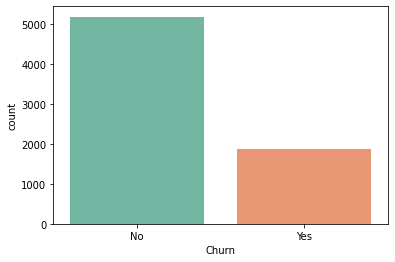

In [145]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.countplot(df['Churn'],palette = "Set2")

<AxesSubplot:xlabel='gender', ylabel='count'>

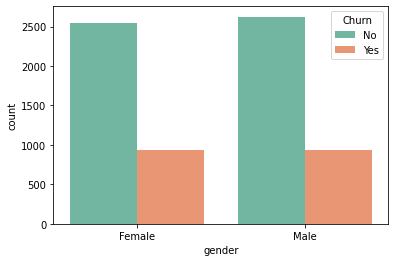

In [146]:
#Visualize the churn count for both Males and Females
sns.countplot(x=df['gender'], hue=df['Churn'], palette = "Set2")

<AxesSubplot:xlabel='InternetService', ylabel='count'>

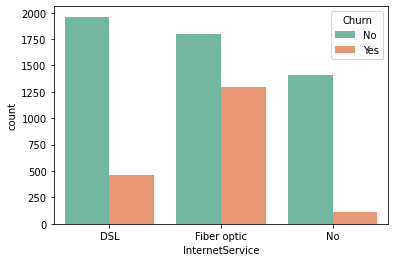

In [147]:
sns.countplot(x=df['InternetService'], hue=df['Churn'], palette = "Set2")

<AxesSubplot:xlabel='Contract', ylabel='count'>

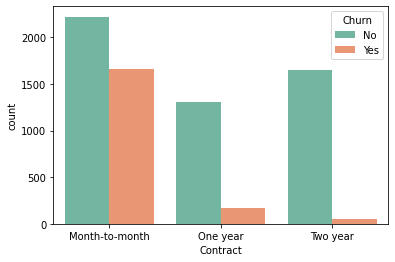

In [148]:
sns.countplot(x=df['Contract'], hue=df['Churn'], palette = "Set2")

In [149]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [150]:
yy=df['Churn']
df.drop('Churn', axis=1, inplace =True)

In [151]:
XX=df.apply(LabelEncoder().fit_transform)

In [154]:
#Create the model
model = LogisticRegression()
#Train the model
model.fit(XX_train, yy_train)

XX_train,XX_test, yy_train, yy_test=train_test_split(XX, yy, test_size=0.3, random_state=42)
predictions = model.predict(XX_test)
#printing the predictions
print(classification_report(yy_test, predictions))

              precision    recall  f1-score   support

          No       0.84      0.90      0.87      1539
         Yes       0.67      0.55      0.61       574

    accuracy                           0.80      2113
   macro avg       0.76      0.73      0.74      2113
weighted avg       0.80      0.80      0.80      2113



C:\ProgramData\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [169]:
from sklearn.metrics import classification_report, confusion_matrix

print(" Confusion Matrix ")
print(confusion_matrix(yy_test, predictions))

 Confusion Matrix 
[[1381  158]
 [ 256  318]]


## Using Random forest for classifying the churn

In [170]:
# importing random forest classifier from assemble module
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

# creating a RF classifier
clf = RandomForestClassifier() 
 
# Training the model on the training dataset
# fit function is used to train the model using the training sets as parameters
clf.fit(X_train, y_train)
 
# performing predictions on the test dataset
y_pred = clf.predict(X_test)
 
print("=== Confusion Matrix ===")
print(confusion_matrix(y_test, y_pred))
print('\n')
print("=== Classification Report ===")
print(classification_report(y_test, y_pred))

=== Confusion Matrix ===
[[1403  136]
 [ 297  277]]


=== Classification Report ===
              precision    recall  f1-score   support

          No       0.83      0.91      0.87      1539
         Yes       0.67      0.48      0.56       574

    accuracy                           0.80      2113
   macro avg       0.75      0.70      0.71      2113
weighted avg       0.78      0.80      0.78      2113



## Churn on the data we got from Customer segmentation Analysis using RFM_Scores

In [52]:
df_rfm=pd.read_csv("rfm_asia.csv")

In [ ]:
df_rfm.drop(['R_rank','F_rank','M_rank','id', 'country'], axis=1,inplace=True)

In [58]:
df_rfm.drop(['R_rank_norm','F_rank_norm','M_rank_norm'], axis=1,inplace=True)

In [61]:
df_rfm.head()

,id+,frequency,lastdate,firstdate,revmax,revmin,monetary,totalunits,Recency,RFM_Score,Customer_segment
0,AF186035892,1,2020-04-06,2020-04-06,27786,27786,27786,1,947,0.96,Lost Customers
1,AF186035934,1,2019-05-13,2019-05-13,18462,18462,18462,1,1276,0.73,Lost Customers
2,AF1915092,342,2020-11-23,2019-01-07,2634372,-120948,55409730,768,716,4.99,Top Customers
3,AF1915452,6,2019-07-08,2019-01-07,120186,18120,231492,7,1220,2.95,Low Value Customers
4,AF1915920,1,2020-01-06,2020-01-06,223860,223860,223860,1,1038,0.88,Lost Customers


In [97]:
df_rfm['churn']=0

df_rfm.loc[(df_rfm['Customer_segment'] == 'Low Value Customers') | (df_rfm['Customer_segment'] == 'Lost Customers'), 'churn'] = 1 

In [98]:
y=df_rfm['churn']
df_rfm.drop('churn', axis=1, inplace =True)

In [101]:
X=df_rfm.apply(LabelEncoder().fit_transform)

In [106]:
X_train,X_test, y_train, y_test=train_test_split(X, y, test_size=0.3, random_state=42)

In [107]:
#Create the model
model = LogisticRegression()
#Train the model
model.fit(X_train, y_train)

C:\ProgramData\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression()

In [109]:
predictions = model.predict(X_test)
#printing the predictions
print(predictions)

[0 1 0 ... 1 0 0]


In [111]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      2569
           1       0.99      0.99      0.99      3986

    accuracy                           0.99      6555
   macro avg       0.99      0.99      0.99      6555
weighted avg       0.99      0.99      0.99      6555



C:\ProgramData\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='Customer_segment', ylabel='count'>

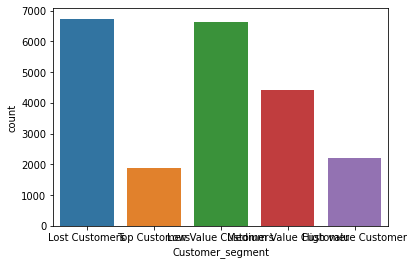

In [118]:

sns.countplot(df_rfm.Customer_segment)


<AxesSubplot:xlabel='Customer_segment'>

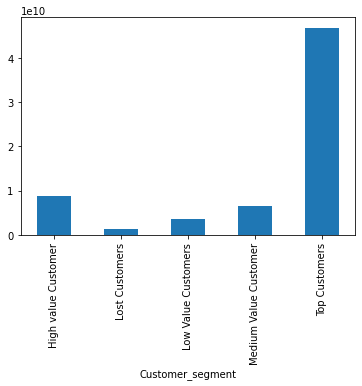

In [128]:
#sns.countplot(df_rfm.Customer_segment, hue=df_rfm['monetary'])
df_rfm.groupby(['Customer_segment']).monetary.sum().plot.bar()

<AxesSubplot:xlabel='Customer_segment'>

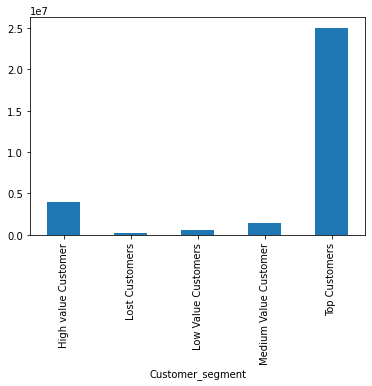

In [133]:
df_rfm.groupby(['Customer_segment']).monetary.agg('mean').plot.bar()